# Importing the dataset

In [5]:
import numpy as np
import pandas as pd
# For visualizations
import matplotlib.pyplot as plt
# For regular expressions
import re
# For handling string
import string
# For performing mathematical operations
import math

# Importing fake news dataset
fake=pd.read_csv('politifact_fake.csv')
fake.head()

,id,news_url,title,tweet_ids
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...


In [6]:
fake["Remarks"]="fake"
fake.head()

,id,news_url,title,tweet_ids,Remarks
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake


In [7]:
# Importing real news dataset
real=pd.read_csv('politifact_real.csv')
real.head()

,id,news_url,title,tweet_ids
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...


In [8]:
real["Remarks"]="real"
real.head()

,id,news_url,title,tweet_ids,Remarks
0,politifact14984,http://www.nfib-sbet.org/,National Federation of Independent Business,967132259869487105\t967164368768196609\t967215...,real
1,politifact12944,http://www.cq.com/doc/newsmakertranscripts-494...,comments in Fayetteville NC,942953459\t8980098198\t16253717352\t1668513250...,real
2,politifact333,https://web.archive.org/web/20080204072132/htt...,"Romney makes pitch, hoping to close deal : Ele...",NaN,real
3,politifact4358,https://web.archive.org/web/20110811143753/htt...,Democratic Leaders Say House Democrats Are Uni...,NaN,real
4,politifact779,https://web.archive.org/web/20070820164107/htt...,"Budget of the United States Government, FY 2008",89804710374154240\t91270460595109888\t96039619...,real


In [9]:
#joining the 2 dataframes
merged=pd.concat([fake,real],join="inner")
merged

,id,news_url,title,tweet_ids,Remarks
0,politifact15014,speedtalk.com/forum/viewtopic.php?t=51650,BREAKING: First NFL Team Declares Bankruptcy O...,937349434668498944\t937379378006282240\t937380...,fake
1,politifact15156,politics2020.info/index.php/2018/03/13/court-o...,Court Orders Obama To Pay $400 Million In Rest...,972666281441878016\t972678396575559680\t972827...,fake
2,politifact14745,www.nscdscamps.org/blog/category/parenting/467...,UPDATE: Second Roy Moore Accuser Works For Mic...,929405740732870656\t929439450400264192\t929439...,fake
3,politifact14355,https://howafrica.com/oscar-pistorius-attempts...,Oscar Pistorius Attempts To Commit Suicide,886941526458347521\t887011300278194176\t887023...,fake
4,politifact15371,http://washingtonsources.org/trump-votes-for-d...,Trump Votes For Death Penalty For Being Gay,915205698212040704\t915242076681506816\t915249...,fake
...,...,...,...,...,...
619,politifact14731,https://www.flake.senate.gov/public/index.cfm/...,Flake: “Religious tests should have no place i...,NaN,real
620,politifact329,https://web.archive.org/web/20080131000131/htt...,Change We Can Believe In,634287923135909888\t946743411100536832\t946816...,real
621,politifact1576,http://www.youtube.com/watch?v=4O8CxZ1OD58,deputy director of national health statistics ...,NaN,real
622,politifact4720,http://www.youtube.com/watch?v=EhyMplwY6HY,Romneys ProLife Conversion Myth or Reality Jun...,188871706637647874,real


# Explore the data

In [10]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1056 entries, 0 to 623
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         1056 non-null   object
 1   news_url   995 non-null    object
 2   title      1056 non-null   object
 3   tweet_ids  801 non-null    object
 4   Remarks    1056 non-null   object
dtypes: object(5)
memory usage: 49.5+ KB


In [11]:
#to see any null value present in our dataset
merged.isnull().sum()

id             0
news_url      61
title          0
tweet_ids    255
Remarks        0
dtype: int64

In [12]:
#drop null value & proceed further
merged.dropna(inplace=True)
merged.isnull().sum()

id           0
news_url     0
title        0
tweet_ids    0
Remarks      0
dtype: int64

### Now dataset has no null values

Text(0, 0.5, 'no of posts')

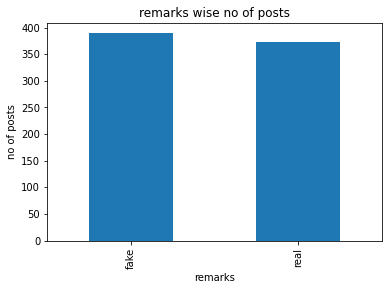

In [14]:
merged['Remarks'].value_counts().plot.bar()
# Add title and axis names
plt.title('remarks wise no of posts')
plt.xlabel('remarks')
plt.ylabel('no of posts')

<AxesSubplot:ylabel='Remarks'>

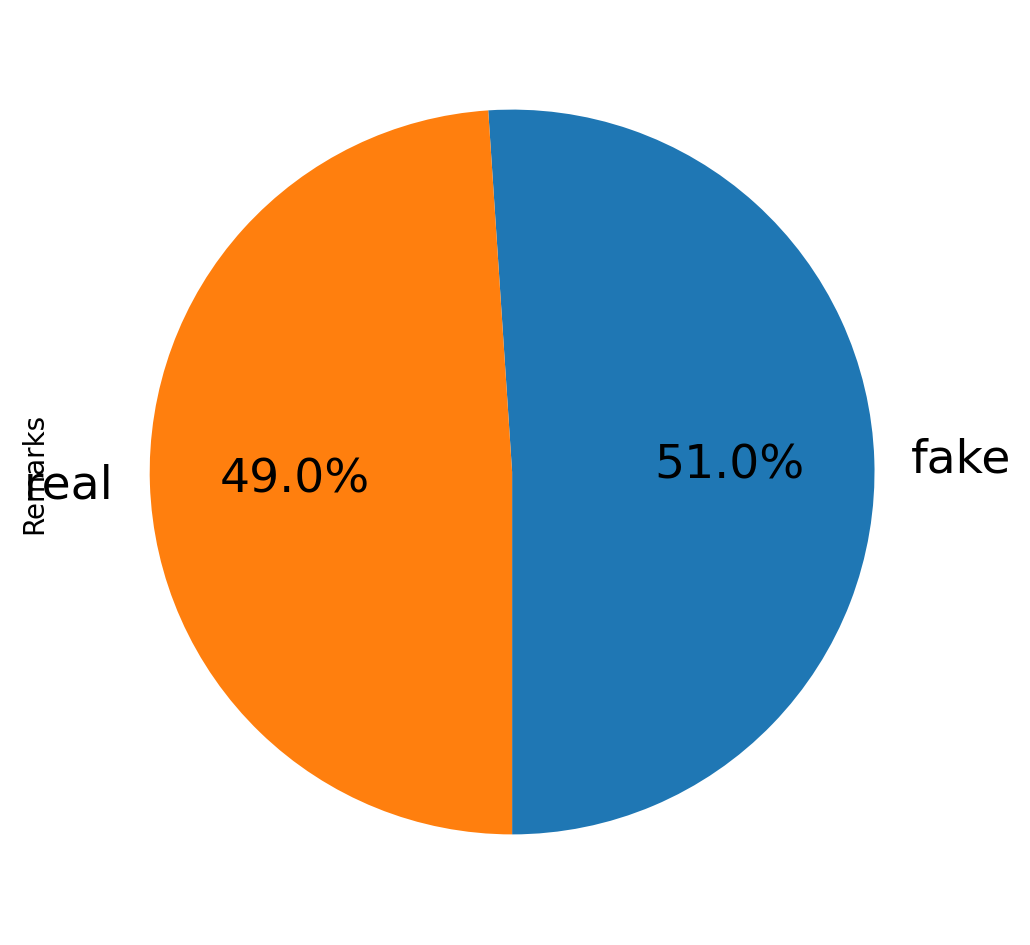

In [16]:
fig = plt.figure(figsize=(6,6), dpi=200)
ax = plt.subplot(111)

merged['Remarks'].value_counts().plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=270, fontsize=17)

In [17]:
df=merged.copy()
df['post'] = df['id'] + ' ' + df['news_url'] + ' ' + df['title'] + ' ' +df['tweet_ids']

df['post'].head()

0    politifact15014 speedtalk.com/forum/viewtopic....
1    politifact15156 politics2020.info/index.php/20...
2    politifact14745 www.nscdscamps.org/blog/catego...
3    politifact14355 https://howafrica.com/oscar-pi...
4    politifact15371 http://washingtonsources.org/t...
Name: post, dtype: object

# Table generation with Word count,Char count, Avg Word count & Stopwords

In [18]:
df['word_count'] = df['post'].apply(lambda x: len(str(x).split(" "))) ##to calculate word count 
df['char_count'] = df['post'].str.len() ## this also includes spaces
#to calculate avg word
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_word'] = df['post'].apply(lambda x: avg_word(x))
#for stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')

df['stopwords'] = df['post'].apply(lambda x: len([x for x in x.split() if x in stop]))
df[['post','word_count','char_count','avg_word','stopwords']].head()

,post,word_count,char_count,avg_word,stopwords
0,politifact15014 speedtalk.com/forum/viewtopic....,12,3220,17.511494,0
1,politifact15156 politics2020.info/index.php/20...,12,2101,17.601770,0
2,politifact14745 www.nscdscamps.org/blog/catego...,15,4391,17.769231,0
3,politifact14355 https://howafrica.com/oscar-pi...,9,539,17.000000,0
4,politifact15371 http://washingtonsources.org/t...,11,10612,17.951786,0


In [19]:
Compare=df.loc[:,['word_count','stopwords']]
Compare.describe()

,word_count,stopwords
count,762.000000,762.000000
mean,12.678478,1.086614
std,5.103943,1.423606
min,4.000000,0.000000
25%,9.000000,0.000000
50%,12.000000,1.000000
75%,15.000000,2.000000
max,41.000000,8.000000


In [25]:
from bs4 import BeautifulSoup

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\'\“\”\’\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))
DIGITS_RE=re.compile('\w*\d\w*')

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = text.replace(r'\n', ' ')
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    #text = ''.join(word for word in text if word not in punct)  # remove punctuation
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    text = DIGITS_RE.sub('', text)
    return text

In [26]:
df['post']=df['post'].apply(clean_text)

In [27]:
# Removing extra spaces
df['post']=df['post'].apply(lambda x: re.sub(' +',' ',x))

# Frequent words

In [28]:
## 10 Common word removal
freq = pd.Series(' '.join(df['post']).split()).value_counts()[:10]
freq

http             535
https            286
web              139
webarchiveorg    137
trump            118
news              85
obama             84
breaking          63
us                50
president         47
dtype: int64

In [29]:
freq = list(freq.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df['post'].head()

0    speedtalkcom forum first nfl team declares ban...
1        indexphp court orders pay million restitution
2    wwwnscdscampsorg blog category parenting updat...
3    howafricacom oscarpistoriusattemptscommitsuici...
4         washingtonsourcesorg votes death penalty gay
Name: post, dtype: object

# Rare words

In [30]:
##10 Rare words removal
rare = pd.Series(' '.join(df['post']).split()).value_counts()[-10:]
rare

marilyn                                          1
movie                                            1
toothpaste                                       1
dqqcx                                            1
surgery                                          1
cast                                             1
moms                                             1
gunrightstrendolizercom                          1
dakota                                           1
breakingbarcelonaterroristcousinusnamedbarack    1
dtype: int64

In [31]:
rare = list(rare.index)
df['post'] = df['post'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
df['post'].head()

0    speedtalkcom forum first nfl team declares ban...
1        indexphp court orders pay million restitution
2    wwwnscdscampsorg blog category parenting updat...
3    howafricacom oscarpistoriusattemptscommitsuici...
4         washingtonsourcesorg votes death penalty gay
Name: post, dtype: object

# Lemmatization

In [32]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization 
df['post']=df['post'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) ]))

In [33]:
df_grouped=df[['Remarks','post']].groupby(by='Remarks').agg(lambda x:' '.join(x))
df_grouped

,post
Remarks,
fake,speedtalkcom forum first nfl team declare bank...
real,wwwnfibsbetorg national federation independent...


# Creating Document Term Matrix

In [34]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['post'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm

,abc,abcnewsgocom,abedin,abortion,aboutus,absorbing,access,accident,accidentally,account,...,xls,year,yearbook,york,young,yournewswirecom,youtube,youtubecom,zakaria,zimbabwetodaycom
Remarks,,,,,,,,,,,,,,,,,,,,,
fake,0,0,1,3,1,1,1,2,2,4,...,0,12,2,4,0,14,1,0,1,1
real,2,11,0,1,0,0,0,0,0,0,...,1,4,0,3,3,0,3,1,0,0


# Wordcloud generation

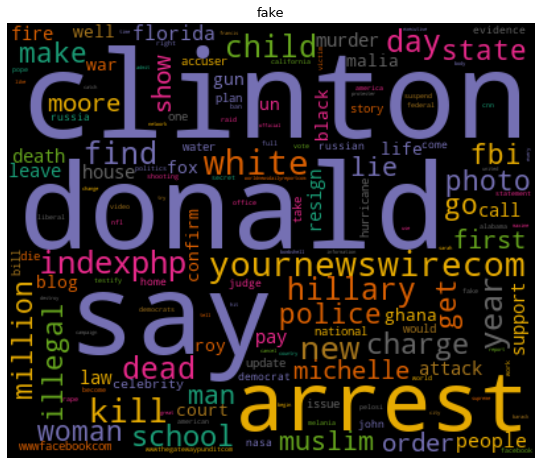

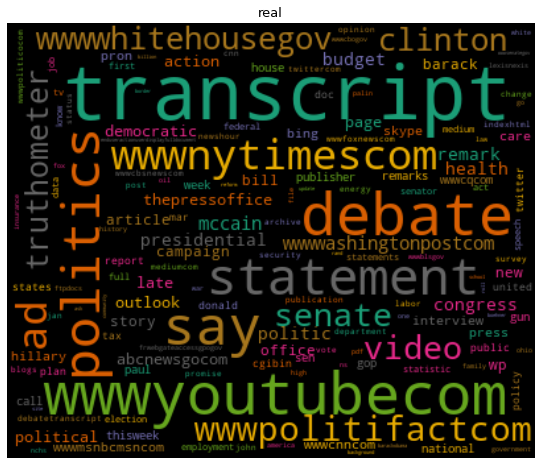

In [35]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
    wc = WordCloud(width=400, height=330, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()
  
#  Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each category
for index,remarks in enumerate(df_dtm.columns):
    generate_wordcloud(df_dtm[remarks].sort_values(ascending=False),remarks)

# Sentiment Analysis

In [36]:
# checking only the polarity
from textblob import TextBlob
df['polarity']=df['post'].apply(lambda x:TextBlob(x).sentiment.polarity)

In [37]:
print("3 Random post with Highest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=False)[:3].index]['post']):
    print('post {}: '.format(index+1),post)

3 Random post with Highest Polarity:
post 1:  wwwssagov history nestorhtml social security online history page
post 2:  wwwviralwdcsite national guard storms mexico border make gamechanging impact day
post 3:  publisher enduseractionuserdisplayfulldocument lexisnexis r publisher


In [38]:
print("3 Random posts with Lowest Polarity:")
for index,post in enumerate(df.iloc[df['polarity'].sort_values(ascending=True)[:3].index]['post']):
    print('\n \n \n post {}: '.format(index+1),post)

3 Random posts with Lowest Polarity:

 
 
 post 1:  wwwthegatewaypunditcom facebookpickssidesalabamasenateraceshutsgatewaypunditbreitbartreportsdiscreditedallredaccuser facebook pick side alabama senate race shuts gateway pundit breitbart reports discredit allre accuser

 
 
 post 2:  mediumcom hillaryforamerica # young people undocumente country

 
 
 post 3:  wwwneonnettlecom videos neon nettle


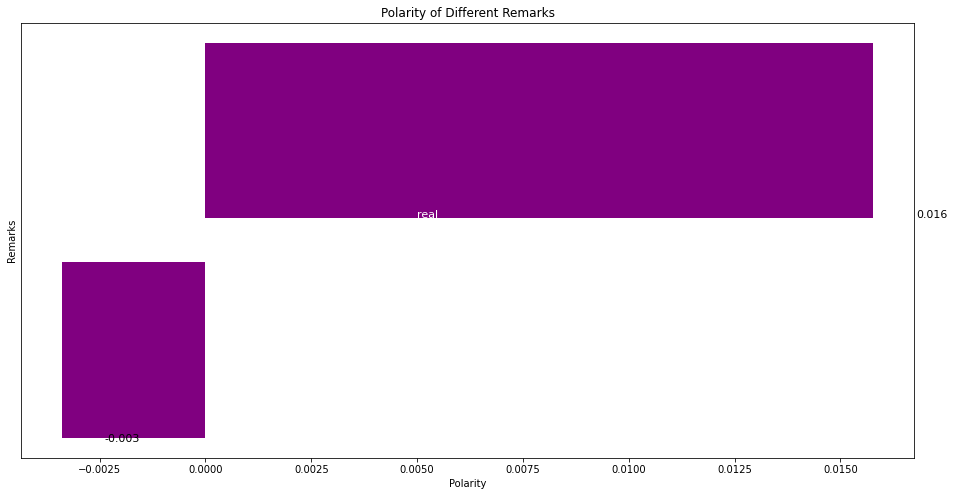

In [39]:
remarks_polarity_sorted=pd.DataFrame(df.groupby('Remarks')['polarity'].mean().sort_values(ascending=True))

plt.figure(figsize=(16,8))
plt.xlabel('Polarity')
plt.ylabel('Remarks')
plt.title('Polarity of Different Remarks')
polarity_graph=plt.barh(np.arange(len(remarks_polarity_sorted.index)),remarks_polarity_sorted['polarity'],color='purple',)

# Writing product names on bar
for bar,remarks in zip(polarity_graph,remarks_polarity_sorted.index):
    plt.text(0.005,bar.get_y()+bar.get_width(),'{}'.format(remarks),va='center',fontsize=11,color='white')

# Writing polarity values on graph
for bar,polarity in zip(polarity_graph,remarks_polarity_sorted['polarity']):
    plt.text(bar.get_width()+0.001,bar.get_y()+bar.get_width(),'%.3f'%polarity,va='center',fontsize=11,color='black')
  
plt.yticks([])
plt.show()

# So we can see that Fake dataset has negative polarity